In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


## Sentiment distribution

(-1.0134973589447356,
 1.0000000209436062,
 -1.0104870255027887,
 1.0085293797545596)

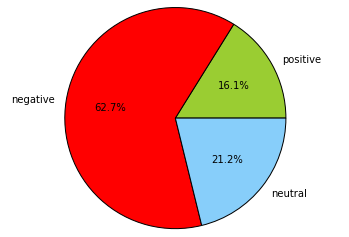

In [5]:
%matplotlib inline
labels = ['positive', 'negative', 'neutral']
sizes = [sum(df['airline_sentiment'] == label) for label in labels]
colors = ['yellowgreen', 'red', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')


## Word frequency distribution

We are interested in the terms frequency distribution since we want to know what frequency we should make the cut-off.
We eliminated stop words and tokenized the tweets using the TweetTokenizer provided by NLTK.


In [7]:
from lib import processing

data, _ = processing.process_data(df, sample_size=1, split_size=1)

Using a total of 14640 tweets
Training sample size: 14640
Testing sample size: 0


We have a vocabulary with 18920 words.


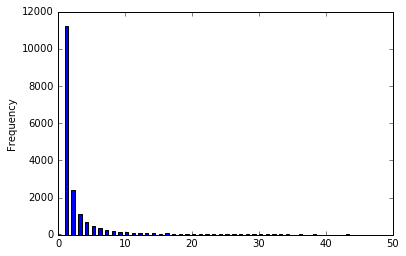

In [30]:
from collections import defaultdict

freq = defaultdict(int)
for tokens, _ in data:
    for token in tokens:
        freq[token] += 1

print("We have a vocabulary with {0} words.".format(len(freq))) 
x = sorted([(value, key) for key, value in freq.items()])
x = pandas.Series(list(freq.values()))
x.plot(kind='hist', bins = 100, range=(0, 50))